# Simple Image Classifier

Beginner-friendly image classifier built with PyTorch and CIFAR-10.

<img alt="A photo of a man on an elephant with an ML-generated overlay showing objects in the frame" src="https://upload.wikimedia.org/wikipedia/commons/a/ae/DenseCap_%28Johnson_et_al.%2C_2016%29_%28cropped%29.png" width=450px>

An image classifier is an ML model that recognizes objects in images. We can build image classifiers by feeding tens of thousands of labelled images to a neural network. Tools like PyTorch train these networks by evaluating their performance against the dataset.

Let's build an image classifier that detects planes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. We'll download a dataset, configure a neural network, train a model, and evaluate its performance.

## Step 1: Download a dataset and preview images

A model is only as good as its dataset.

Training tools need lots of high-quality data to build accurate models. We'll use the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) of 60,000 photos to build our image classifier. Get started by downloading the dataset with `torchvision` and previewing a handful of images from it.

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


Files already downloaded and verified


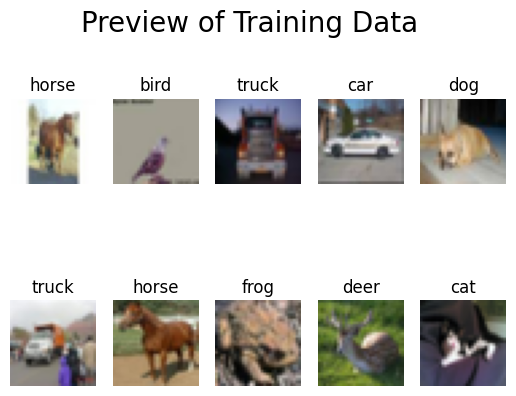

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Download the CIFAR-10 dataset to ./data
batch_size=10
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
print("Downloading training data...")
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
print("Downloading testing data...")
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Our model will recognize these kinds of objects
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Grab images from our training data
dataiter = iter(trainloader)
images, labels = dataiter.next()

for i in range(batch_size):
    # Add new subplot
    plt.subplot(2, int(batch_size/2), i + 1)
    # Plot the image
    img = images[i]
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    # Add the image's label
    plt.title(classes[labels[i]])

plt.suptitle('Preview of Training Data', size=20)
plt.show()

# Step 2: Configure the neural network

Now that we have our dataset, we need to set up a neural network for PyTorch. Our neural network will transform an image into a description.

In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define a convolutional neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

print("Your network is ready for training!")

Your network is ready for training!


# Step 3: Train the network and save model

PyTorch trains our network by adjusting its parameters and evaluating its performance against our labelled dataset.

In [3]:
from tqdm import tqdm

EPOCHS = 2
print("Training...")
for epoch in range(EPOCHS):
    running_loss = 0.0
    for i, data in enumerate(tqdm(trainloader, desc=f"Epoch {epoch + 1} of {EPOCHS}", leave=True, ncols=80)):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Save our trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Training...


Epoch 1 of 2:   0%|                                    | 0/5000 [00:00<?, ?it/s]

Epoch 1 of 2:   0%|                          | 15/5000 [00:00<00:33, 148.40it/s]

Epoch 1 of 2:   1%|▏                         | 41/5000 [00:00<00:23, 210.96it/s]

Epoch 1 of 2:   1%|▎                         | 67/5000 [00:00<00:21, 230.79it/s]

Epoch 1 of 2:   2%|▍                         | 95/5000 [00:00<00:19, 246.93it/s]

Epoch 1 of 2:   2%|▌                        | 120/5000 [00:00<00:20, 243.49it/s]

Epoch 1 of 2:   3%|▋                        | 145/5000 [00:00<00:19, 244.30it/s]

Epoch 1 of 2:   3%|▊                        | 170/5000 [00:00<00:20, 238.78it/s]

Epoch 1 of 2:   4%|▉                        | 196/5000 [00:00<00:19, 242.84it/s]

Epoch 1 of 2:   4%|█                        | 222/5000 [00:00<00:19, 246.43it/s]

Epoch 1 of 2:   5%|█▏                       | 247/5000 [00:01<00:19, 238.98it/s]

Epoch 1 of 2:   6%|█▍                       | 279/5000 [00:01<00:18, 262.19it/s]

Epoch 1 of 2:   6%|█▌                       | 307/5000 [00:01<00:17, 266.88it/s]

Epoch 1 of 2:   7%|█▋                       | 335/5000 [00:01<00:17, 268.94it/s]

Epoch 1 of 2:   7%|█▊                       | 362/5000 [00:01<00:17, 262.73it/s]

Epoch 1 of 2:   8%|█▉                       | 389/5000 [00:01<00:19, 242.22it/s]

Epoch 1 of 2:   8%|██                       | 414/5000 [00:01<00:18, 243.19it/s]

Epoch 1 of 2:   9%|██▏                      | 439/5000 [00:01<00:19, 236.89it/s]

Epoch 1 of 2:   9%|██▎                      | 463/5000 [00:01<00:19, 230.09it/s]

Epoch 1 of 2:  10%|██▍                      | 487/5000 [00:02<00:20, 215.99it/s]

Epoch 1 of 2:  10%|██▌                      | 509/5000 [00:02<00:20, 214.29it/s]

Epoch 1 of 2:  11%|██▋                      | 531/5000 [00:02<00:21, 212.44it/s]

Epoch 1 of 2:  11%|██▊                      | 555/5000 [00:02<00:20, 218.12it/s]

Epoch 1 of 2:  12%|██▉                      | 583/5000 [00:02<00:18, 235.53it/s]

Epoch 1 of 2:  12%|███                      | 610/5000 [00:02<00:17, 245.42it/s]

Epoch 1 of 2:  13%|███▏                     | 640/5000 [00:02<00:16, 258.57it/s]

Epoch 1 of 2:  13%|███▎                     | 668/5000 [00:02<00:16, 264.06it/s]

Epoch 1 of 2:  14%|███▍                     | 698/5000 [00:02<00:15, 272.30it/s]

Epoch 1 of 2:  15%|███▋                     | 726/5000 [00:02<00:15, 271.98it/s]

Epoch 1 of 2:  15%|███▊                     | 755/5000 [00:03<00:15, 274.08it/s]

Epoch 1 of 2:  16%|███▉                     | 783/5000 [00:03<00:16, 251.37it/s]

Epoch 1 of 2:  16%|████                     | 809/5000 [00:03<00:17, 236.14it/s]

Epoch 1 of 2:  17%|████▏                    | 836/5000 [00:03<00:17, 244.93it/s]

Epoch 1 of 2:  17%|████▎                    | 862/5000 [00:03<00:16, 247.26it/s]

Epoch 1 of 2:  18%|████▍                    | 888/5000 [00:03<00:19, 208.32it/s]

Epoch 1 of 2:  18%|████▌                    | 911/5000 [00:03<00:19, 210.94it/s]

Epoch 1 of 2:  19%|████▋                    | 933/5000 [00:03<00:20, 196.98it/s]

Epoch 1 of 2:  19%|████▊                    | 954/5000 [00:04<00:20, 196.52it/s]

Epoch 1 of 2:  20%|████▉                    | 980/5000 [00:04<00:19, 210.70it/s]

Epoch 1 of 2:  20%|████▊                   | 1007/5000 [00:04<00:17, 226.01it/s]

Epoch 1 of 2:  21%|████▉                   | 1031/5000 [00:04<00:18, 217.27it/s]

Epoch 1 of 2:  21%|█████                   | 1058/5000 [00:04<00:17, 229.84it/s]

Epoch 1 of 2:  22%|█████▏                  | 1082/5000 [00:04<00:20, 190.61it/s]

Epoch 1 of 2:  22%|█████▎                  | 1107/5000 [00:04<00:19, 204.84it/s]

Epoch 1 of 2:  23%|█████▍                  | 1135/5000 [00:04<00:17, 223.67it/s]

Epoch 1 of 2:  23%|█████▌                  | 1163/5000 [00:04<00:16, 238.80it/s]

Epoch 1 of 2:  24%|█████▋                  | 1192/5000 [00:05<00:15, 252.40it/s]

Epoch 1 of 2:  24%|█████▊                  | 1218/5000 [00:05<00:17, 211.78it/s]

Epoch 1 of 2:  25%|█████▉                  | 1241/5000 [00:05<00:23, 157.61it/s]

Epoch 1 of 2:  25%|██████                  | 1264/5000 [00:05<00:21, 171.48it/s]

Epoch 1 of 2:  26%|██████▏                 | 1290/5000 [00:05<00:19, 190.55it/s]

Epoch 1 of 2:  26%|██████▎                 | 1312/5000 [00:05<00:19, 190.67it/s]

Epoch 1 of 2:  27%|██████▍                 | 1338/5000 [00:05<00:17, 208.05it/s]

Epoch 1 of 2:  27%|██████▌                 | 1363/5000 [00:06<00:16, 219.13it/s]

Epoch 1 of 2:  28%|██████▋                 | 1387/5000 [00:06<00:16, 217.54it/s]

Epoch 1 of 2:  28%|██████▊                 | 1415/5000 [00:06<00:15, 234.01it/s]

Epoch 1 of 2:  29%|██████▉                 | 1444/5000 [00:06<00:14, 248.74it/s]

Epoch 1 of 2:  29%|███████                 | 1471/5000 [00:06<00:13, 253.85it/s]

Epoch 1 of 2:  30%|███████▏                | 1502/5000 [00:06<00:12, 269.56it/s]

Epoch 1 of 2:  31%|███████▎                | 1534/5000 [00:06<00:12, 281.41it/s]

Epoch 1 of 2:  31%|███████▌                | 1563/5000 [00:06<00:12, 281.25it/s]

Epoch 1 of 2:  32%|███████▋                | 1592/5000 [00:06<00:12, 281.11it/s]

Epoch 1 of 2:  32%|███████▊                | 1621/5000 [00:06<00:11, 281.59it/s]

Epoch 1 of 2:  33%|███████▉                | 1650/5000 [00:07<00:11, 283.81it/s]

Epoch 1 of 2:  34%|████████                | 1679/5000 [00:07<00:12, 267.74it/s]

Epoch 1 of 2:  34%|████████▏               | 1707/5000 [00:07<00:13, 249.26it/s]

Epoch 1 of 2:  35%|████████▎               | 1733/5000 [00:07<00:13, 239.70it/s]

Epoch 1 of 2:  35%|████████▍               | 1759/5000 [00:07<00:13, 242.55it/s]

Epoch 1 of 2:  36%|████████▌               | 1786/5000 [00:07<00:12, 248.54it/s]

Epoch 1 of 2:  36%|████████▋               | 1812/5000 [00:07<00:12, 249.45it/s]

Epoch 1 of 2:  37%|████████▊               | 1838/5000 [00:07<00:12, 250.51it/s]

Epoch 1 of 2:  37%|████████▉               | 1864/5000 [00:07<00:12, 250.81it/s]

Epoch 1 of 2:  38%|█████████               | 1892/5000 [00:08<00:12, 256.57it/s]

Epoch 1 of 2:  38%|█████████▏              | 1921/5000 [00:08<00:11, 263.78it/s]

Epoch 1 of 2:  39%|█████████▎              | 1948/5000 [00:08<00:11, 265.13it/s]

Epoch 1 of 2:  40%|█████████▍              | 1975/5000 [00:08<00:11, 264.20it/s]

Epoch 1 of 2:  40%|█████████▌              | 2003/5000 [00:08<00:11, 267.21it/s]

Epoch 1 of 2:  41%|█████████▊              | 2033/5000 [00:08<00:10, 276.27it/s]

Epoch 1 of 2:  41%|█████████▉              | 2063/5000 [00:08<00:10, 282.65it/s]

Epoch 1 of 2:  42%|██████████              | 2092/5000 [00:08<00:10, 279.81it/s]

Epoch 1 of 2:  42%|██████████▏             | 2121/5000 [00:08<00:10, 280.18it/s]

Epoch 1 of 2:  43%|██████████▎             | 2150/5000 [00:08<00:10, 281.34it/s]

Epoch 1 of 2:  44%|██████████▍             | 2179/5000 [00:09<00:10, 280.95it/s]

Epoch 1 of 2:  44%|██████████▌             | 2208/5000 [00:09<00:09, 282.27it/s]

Epoch 1 of 2:  45%|██████████▋             | 2237/5000 [00:09<00:10, 274.11it/s]

Epoch 1 of 2:  45%|██████████▊             | 2265/5000 [00:09<00:10, 253.17it/s]

Epoch 1 of 2:  46%|██████████▉             | 2291/5000 [00:09<00:11, 245.33it/s]

Epoch 1 of 2:  46%|███████████▏            | 2319/5000 [00:09<00:10, 253.68it/s]

Epoch 1 of 2:  47%|███████████▎            | 2348/5000 [00:09<00:10, 262.65it/s]

Epoch 1 of 2:  48%|███████████▍            | 2380/5000 [00:09<00:09, 275.78it/s]

Epoch 1 of 2:  48%|███████████▌            | 2412/5000 [00:09<00:09, 286.42it/s]

Epoch 1 of 2:  49%|███████████▋            | 2441/5000 [00:10<00:09, 267.48it/s]

Epoch 1 of 2:  49%|███████████▊            | 2470/5000 [00:10<00:09, 272.45it/s]

Epoch 1 of 2:  50%|███████████▉            | 2498/5000 [00:10<00:09, 273.40it/s]

Epoch 1 of 2:  51%|████████████            | 2526/5000 [00:10<00:09, 274.86it/s]

Epoch 1 of 2:  51%|████████████▎           | 2554/5000 [00:10<00:09, 269.66it/s]

Epoch 1 of 2:  52%|████████████▍           | 2582/5000 [00:10<00:08, 272.31it/s]

Epoch 1 of 2:  52%|████████████▌           | 2611/5000 [00:10<00:08, 274.78it/s]

Epoch 1 of 2:  53%|████████████▋           | 2639/5000 [00:10<00:08, 275.60it/s]

Epoch 1 of 2:  53%|████████████▊           | 2667/5000 [00:10<00:08, 276.17it/s]

Epoch 1 of 2:  54%|████████████▉           | 2695/5000 [00:10<00:08, 270.05it/s]

Epoch 1 of 2:  54%|█████████████           | 2723/5000 [00:11<00:08, 257.83it/s]

Epoch 1 of 2:  55%|█████████████▏          | 2749/5000 [00:11<00:09, 240.61it/s]

Epoch 1 of 2:  56%|█████████████▎          | 2775/5000 [00:11<00:09, 244.34it/s]

Epoch 1 of 2:  56%|█████████████▍          | 2803/5000 [00:11<00:08, 253.44it/s]

Epoch 1 of 2:  57%|█████████████▌          | 2829/5000 [00:11<00:08, 250.96it/s]

Epoch 1 of 2:  57%|█████████████▋          | 2858/5000 [00:11<00:08, 261.79it/s]

Epoch 1 of 2:  58%|█████████████▊          | 2885/5000 [00:11<00:08, 263.84it/s]

Epoch 1 of 2:  58%|█████████████▉          | 2913/5000 [00:11<00:07, 268.17it/s]

Epoch 1 of 2:  59%|██████████████          | 2941/5000 [00:11<00:07, 267.63it/s]

Epoch 1 of 2:  59%|██████████████▎         | 2971/5000 [00:12<00:07, 275.70it/s]

Epoch 1 of 2:  60%|██████████████▍         | 2999/5000 [00:12<00:07, 261.72it/s]

Epoch 1 of 2:  61%|██████████████▌         | 3026/5000 [00:12<00:07, 255.89it/s]

Epoch 1 of 2:  61%|██████████████▋         | 3052/5000 [00:12<00:07, 256.97it/s]

Epoch 1 of 2:  62%|██████████████▊         | 3080/5000 [00:12<00:07, 261.24it/s]

Epoch 1 of 2:  62%|██████████████▉         | 3107/5000 [00:12<00:07, 259.48it/s]

Epoch 1 of 2:  63%|███████████████         | 3134/5000 [00:12<00:07, 247.43it/s]

Epoch 1 of 2:  63%|███████████████▏        | 3161/5000 [00:12<00:07, 251.58it/s]

Epoch 1 of 2:  64%|███████████████▎        | 3187/5000 [00:12<00:07, 251.43it/s]

Epoch 1 of 2:  64%|███████████████▍        | 3216/5000 [00:13<00:06, 260.70it/s]

Epoch 1 of 2:  65%|███████████████▌        | 3244/5000 [00:13<00:06, 265.23it/s]

Epoch 1 of 2:  65%|███████████████▋        | 3271/5000 [00:13<00:06, 256.82it/s]

Epoch 1 of 2:  66%|███████████████▊        | 3297/5000 [00:13<00:06, 254.61it/s]

Epoch 1 of 2:  67%|███████████████▉        | 3326/5000 [00:13<00:06, 262.50it/s]

Epoch 1 of 2:  67%|████████████████        | 3353/5000 [00:13<00:06, 263.25it/s]

Epoch 1 of 2:  68%|████████████████▏       | 3381/5000 [00:13<00:06, 267.31it/s]

Epoch 1 of 2:  68%|████████████████▎       | 3410/5000 [00:13<00:05, 272.42it/s]

Epoch 1 of 2:  69%|████████████████▌       | 3438/5000 [00:13<00:05, 271.34it/s]

Epoch 1 of 2:  69%|████████████████▋       | 3467/5000 [00:13<00:05, 274.75it/s]

Epoch 1 of 2:  70%|████████████████▊       | 3496/5000 [00:14<00:05, 276.31it/s]

Epoch 1 of 2:  70%|████████████████▉       | 3524/5000 [00:14<00:05, 272.83it/s]

Epoch 1 of 2:  71%|█████████████████       | 3552/5000 [00:14<00:05, 257.52it/s]

Epoch 1 of 2:  72%|█████████████████▏      | 3578/5000 [00:14<00:05, 255.76it/s]

Epoch 1 of 2:  72%|█████████████████▎      | 3605/5000 [00:14<00:05, 258.95it/s]

Epoch 1 of 2:  73%|█████████████████▍      | 3631/5000 [00:14<00:05, 249.14it/s]

Epoch 1 of 2:  73%|█████████████████▌      | 3657/5000 [00:14<00:05, 251.18it/s]

Epoch 1 of 2:  74%|█████████████████▋      | 3683/5000 [00:14<00:05, 252.06it/s]

Epoch 1 of 2:  74%|█████████████████▊      | 3709/5000 [00:14<00:05, 250.57it/s]

Epoch 1 of 2:  75%|█████████████████▉      | 3735/5000 [00:15<00:05, 250.04it/s]

Epoch 1 of 2:  75%|██████████████████      | 3761/5000 [00:15<00:05, 241.76it/s]

Epoch 1 of 2:  76%|██████████████████▏     | 3788/5000 [00:15<00:04, 247.59it/s]

Epoch 1 of 2:  76%|██████████████████▎     | 3815/5000 [00:15<00:04, 252.57it/s]

Epoch 1 of 2:  77%|██████████████████▍     | 3844/5000 [00:15<00:04, 261.41it/s]

Epoch 1 of 2:  77%|██████████████████▌     | 3873/5000 [00:15<00:04, 266.74it/s]

Epoch 1 of 2:  78%|██████████████████▋     | 3900/5000 [00:15<00:04, 264.98it/s]

Epoch 1 of 2:  79%|██████████████████▊     | 3928/5000 [00:15<00:04, 266.56it/s]

Epoch 1 of 2:  79%|██████████████████▉     | 3957/5000 [00:15<00:03, 271.05it/s]

Epoch 1 of 2:  80%|███████████████████▏    | 3985/5000 [00:15<00:03, 269.49it/s]

Epoch 1 of 2:  80%|███████████████████▎    | 4013/5000 [00:16<00:03, 272.11it/s]

Epoch 1 of 2:  81%|███████████████████▍    | 4041/5000 [00:16<00:03, 264.31it/s]

Epoch 1 of 2:  81%|███████████████████▌    | 4068/5000 [00:16<00:03, 246.96it/s]

Epoch 1 of 2:  82%|███████████████████▋    | 4093/5000 [00:16<00:04, 219.23it/s]

Epoch 1 of 2:  82%|███████████████████▊    | 4119/5000 [00:16<00:03, 226.88it/s]

Epoch 1 of 2:  83%|███████████████████▉    | 4143/5000 [00:16<00:03, 227.27it/s]

Epoch 1 of 2:  83%|████████████████████    | 4168/5000 [00:16<00:03, 230.90it/s]

Epoch 1 of 2:  84%|████████████████████▏   | 4193/5000 [00:16<00:03, 235.81it/s]

Epoch 1 of 2:  84%|████████████████████▏   | 4217/5000 [00:16<00:03, 235.69it/s]

Epoch 1 of 2:  85%|████████████████████▎   | 4241/5000 [00:17<00:03, 233.62it/s]

Epoch 1 of 2:  85%|████████████████████▍   | 4268/5000 [00:17<00:03, 242.72it/s]

Epoch 1 of 2:  86%|████████████████████▌   | 4293/5000 [00:17<00:02, 244.13it/s]

Epoch 1 of 2:  86%|████████████████████▋   | 4318/5000 [00:17<00:02, 237.72it/s]

Epoch 1 of 2:  87%|████████████████████▊   | 4342/5000 [00:17<00:02, 235.93it/s]

Epoch 1 of 2:  87%|████████████████████▉   | 4366/5000 [00:17<00:02, 224.68it/s]

Epoch 1 of 2:  88%|█████████████████████   | 4389/5000 [00:17<00:02, 219.96it/s]

Epoch 1 of 2:  88%|█████████████████████▏  | 4415/5000 [00:17<00:02, 230.73it/s]

Epoch 1 of 2:  89%|█████████████████████▎  | 4442/5000 [00:17<00:02, 240.60it/s]

Epoch 1 of 2:  89%|█████████████████████▍  | 4468/5000 [00:18<00:02, 244.25it/s]

Epoch 1 of 2:  90%|█████████████████████▌  | 4495/5000 [00:18<00:02, 250.16it/s]

Epoch 1 of 2:  90%|█████████████████████▋  | 4521/5000 [00:18<00:01, 243.34it/s]

Epoch 1 of 2:  91%|█████████████████████▊  | 4546/5000 [00:18<00:01, 238.33it/s]

Epoch 1 of 2:  91%|█████████████████████▉  | 4572/5000 [00:18<00:01, 241.86it/s]

Epoch 1 of 2:  92%|██████████████████████  | 4597/5000 [00:18<00:01, 236.84it/s]

Epoch 1 of 2:  92%|██████████████████████▏ | 4622/5000 [00:18<00:01, 240.24it/s]

Epoch 1 of 2:  93%|██████████████████████▎ | 4648/5000 [00:18<00:01, 245.87it/s]

Epoch 1 of 2:  94%|██████████████████████▍ | 4675/5000 [00:18<00:01, 252.86it/s]

Epoch 1 of 2:  94%|██████████████████████▌ | 4702/5000 [00:18<00:01, 255.33it/s]

Epoch 1 of 2:  95%|██████████████████████▋ | 4728/5000 [00:19<00:01, 250.07it/s]

Epoch 1 of 2:  95%|██████████████████████▊ | 4754/5000 [00:19<00:00, 249.62it/s]

Epoch 1 of 2:  96%|██████████████████████▉ | 4781/5000 [00:19<00:00, 252.84it/s]

Epoch 1 of 2:  96%|███████████████████████ | 4807/5000 [00:19<00:00, 251.10it/s]

Epoch 1 of 2:  97%|███████████████████████▏| 4833/5000 [00:19<00:00, 252.89it/s]

Epoch 1 of 2:  97%|███████████████████████▎| 4860/5000 [00:19<00:00, 256.06it/s]

Epoch 1 of 2:  98%|███████████████████████▍| 4886/5000 [00:19<00:00, 248.75it/s]

Epoch 1 of 2:  98%|███████████████████████▌| 4913/5000 [00:19<00:00, 254.04it/s]

Epoch 1 of 2:  99%|███████████████████████▋| 4941/5000 [00:19<00:00, 260.05it/s]

Epoch 1 of 2:  99%|███████████████████████▊| 4970/5000 [00:19<00:00, 267.21it/s]

Epoch 1 of 2: 100%|████████████████████████| 5000/5000 [00:20<00:00, 274.65it/s]

Epoch 1 of 2: 100%|████████████████████████| 5000/5000 [00:20<00:00, 248.60it/s]

Epoch 2 of 2:   0%|                                    | 0/5000 [00:00<?, ?it/s]

Epoch 2 of 2:   0%|                          | 14/5000 [00:00<00:36, 137.12it/s]

Epoch 2 of 2:   1%|▏                         | 40/5000 [00:00<00:23, 206.99it/s]

Epoch 2 of 2:   1%|▎                         | 67/5000 [00:00<00:21, 234.33it/s]

Epoch 2 of 2:   2%|▍                         | 94/5000 [00:00<00:19, 245.72it/s]

Epoch 2 of 2:   2%|▌                        | 119/5000 [00:00<00:20, 240.55it/s]

Epoch 2 of 2:   3%|▋                        | 144/5000 [00:00<00:20, 236.78it/s]

Epoch 2 of 2:   3%|▊                        | 172/5000 [00:00<00:19, 248.53it/s]

Epoch 2 of 2:   4%|█                        | 202/5000 [00:00<00:18, 261.59it/s]

Epoch 2 of 2:   5%|█▏                       | 234/5000 [00:00<00:17, 276.87it/s]

Epoch 2 of 2:   5%|█▎                       | 264/5000 [00:01<00:16, 283.38it/s]

Epoch 2 of 2:   6%|█▍                       | 293/5000 [00:01<00:16, 281.72it/s]

Epoch 2 of 2:   6%|█▌                       | 322/5000 [00:01<00:17, 265.72it/s]

Epoch 2 of 2:   7%|█▋                       | 349/5000 [00:01<00:18, 255.20it/s]

Epoch 2 of 2:   8%|█▉                       | 375/5000 [00:01<00:18, 253.74it/s]

Epoch 2 of 2:   8%|██                       | 401/5000 [00:01<00:18, 249.34it/s]

Epoch 2 of 2:   9%|██▏                      | 428/5000 [00:01<00:18, 251.38it/s]

Epoch 2 of 2:   9%|██▎                      | 454/5000 [00:01<00:18, 245.99it/s]

Epoch 2 of 2:  10%|██▍                      | 481/5000 [00:01<00:17, 252.04it/s]

Epoch 2 of 2:  10%|██▌                      | 507/5000 [00:02<00:18, 247.21it/s]

Epoch 2 of 2:  11%|██▋                      | 534/5000 [00:02<00:17, 251.00it/s]

Epoch 2 of 2:  11%|██▊                      | 560/5000 [00:02<00:17, 251.49it/s]

Epoch 2 of 2:  12%|██▉                      | 586/5000 [00:02<00:18, 243.75it/s]

Epoch 2 of 2:  12%|███                      | 615/5000 [00:02<00:17, 254.67it/s]

Epoch 2 of 2:  13%|███▏                     | 643/5000 [00:02<00:16, 260.23it/s]

Epoch 2 of 2:  13%|███▎                     | 670/5000 [00:02<00:17, 244.39it/s]

Epoch 2 of 2:  14%|███▍                     | 695/5000 [00:02<00:17, 242.17it/s]

Epoch 2 of 2:  14%|███▌                     | 724/5000 [00:02<00:16, 254.58it/s]

Epoch 2 of 2:  15%|███▊                     | 755/5000 [00:02<00:15, 267.48it/s]

Epoch 2 of 2:  16%|███▉                     | 786/5000 [00:03<00:15, 278.44it/s]

Epoch 2 of 2:  16%|████                     | 814/5000 [00:03<00:15, 276.80it/s]

Epoch 2 of 2:  17%|████▏                    | 843/5000 [00:03<00:14, 278.55it/s]

Epoch 2 of 2:  17%|████▎                    | 872/5000 [00:03<00:14, 280.01it/s]

Epoch 2 of 2:  18%|████▌                    | 901/5000 [00:03<00:14, 278.10it/s]

Epoch 2 of 2:  19%|████▋                    | 929/5000 [00:03<00:14, 277.12it/s]

Epoch 2 of 2:  19%|████▊                    | 957/5000 [00:03<00:14, 276.20it/s]

Epoch 2 of 2:  20%|████▉                    | 985/5000 [00:03<00:14, 275.74it/s]

Epoch 2 of 2:  20%|████▊                   | 1013/5000 [00:03<00:14, 276.98it/s]

Epoch 2 of 2:  21%|█████                   | 1042/5000 [00:04<00:14, 279.30it/s]

Epoch 2 of 2:  21%|█████▏                  | 1070/5000 [00:04<00:15, 258.43it/s]

Epoch 2 of 2:  22%|█████▎                  | 1097/5000 [00:04<00:16, 243.03it/s]

Epoch 2 of 2:  22%|█████▍                  | 1122/5000 [00:04<00:16, 235.10it/s]

Epoch 2 of 2:  23%|█████▌                  | 1150/5000 [00:04<00:15, 246.04it/s]

Epoch 2 of 2:  24%|█████▋                  | 1178/5000 [00:04<00:15, 253.82it/s]

Epoch 2 of 2:  24%|█████▊                  | 1204/5000 [00:04<00:15, 248.70it/s]

Epoch 2 of 2:  25%|█████▉                  | 1230/5000 [00:04<00:16, 228.61it/s]

Epoch 2 of 2:  25%|██████                  | 1254/5000 [00:04<00:17, 216.05it/s]

Epoch 2 of 2:  26%|██████▏                 | 1285/5000 [00:05<00:15, 240.09it/s]

Epoch 2 of 2:  26%|██████▎                 | 1313/5000 [00:05<00:14, 249.03it/s]

Epoch 2 of 2:  27%|██████▍                 | 1344/5000 [00:05<00:13, 263.84it/s]

Epoch 2 of 2:  27%|██████▌                 | 1373/5000 [00:05<00:13, 269.07it/s]

Epoch 2 of 2:  28%|██████▋                 | 1403/5000 [00:05<00:13, 275.65it/s]

Epoch 2 of 2:  29%|██████▉                 | 1433/5000 [00:05<00:12, 280.29it/s]

Epoch 2 of 2:  29%|███████                 | 1462/5000 [00:05<00:12, 273.30it/s]

Epoch 2 of 2:  30%|███████▏                | 1490/5000 [00:05<00:12, 273.88it/s]

Epoch 2 of 2:  30%|███████▎                | 1519/5000 [00:05<00:12, 275.33it/s]

Epoch 2 of 2:  31%|███████▍                | 1549/5000 [00:05<00:12, 280.67it/s]

Epoch 2 of 2:  32%|███████▌                | 1578/5000 [00:06<00:12, 281.27it/s]

Epoch 2 of 2:  32%|███████▋                | 1607/5000 [00:06<00:12, 279.11it/s]

Epoch 2 of 2:  33%|███████▊                | 1636/5000 [00:06<00:11, 280.97it/s]

Epoch 2 of 2:  33%|███████▉                | 1665/5000 [00:06<00:13, 248.43it/s]

Epoch 2 of 2:  34%|████████▏               | 1693/5000 [00:06<00:12, 254.99it/s]

Epoch 2 of 2:  34%|████████▎               | 1720/5000 [00:06<00:12, 255.39it/s]

Epoch 2 of 2:  35%|████████▍               | 1746/5000 [00:06<00:13, 246.23it/s]

Epoch 2 of 2:  35%|████████▌               | 1772/5000 [00:06<00:12, 249.84it/s]

Epoch 2 of 2:  36%|████████▋               | 1798/5000 [00:06<00:13, 237.87it/s]

Epoch 2 of 2:  37%|████████▊               | 1827/5000 [00:07<00:12, 250.26it/s]

Epoch 2 of 2:  37%|████████▉               | 1854/5000 [00:07<00:12, 254.98it/s]

Epoch 2 of 2:  38%|█████████               | 1883/5000 [00:07<00:11, 262.50it/s]

Epoch 2 of 2:  38%|█████████▏              | 1910/5000 [00:07<00:12, 248.02it/s]

Epoch 2 of 2:  39%|█████████▎              | 1939/5000 [00:07<00:11, 257.51it/s]

Epoch 2 of 2:  39%|█████████▍              | 1965/5000 [00:07<00:11, 253.74it/s]

Epoch 2 of 2:  40%|█████████▌              | 1991/5000 [00:07<00:13, 221.35it/s]

Epoch 2 of 2:  40%|█████████▋              | 2014/5000 [00:07<00:13, 222.09it/s]

Epoch 2 of 2:  41%|█████████▊              | 2039/5000 [00:07<00:12, 228.68it/s]

Epoch 2 of 2:  41%|█████████▉              | 2068/5000 [00:08<00:11, 244.76it/s]

Epoch 2 of 2:  42%|██████████              | 2096/5000 [00:08<00:11, 253.99it/s]

Epoch 2 of 2:  42%|██████████▏             | 2124/5000 [00:08<00:11, 260.30it/s]

Epoch 2 of 2:  43%|██████████▎             | 2152/5000 [00:08<00:10, 265.48it/s]

Epoch 2 of 2:  44%|██████████▍             | 2181/5000 [00:08<00:10, 272.24it/s]

Epoch 2 of 2:  44%|██████████▌             | 2210/5000 [00:08<00:10, 274.93it/s]

Epoch 2 of 2:  45%|██████████▋             | 2238/5000 [00:08<00:10, 275.49it/s]

Epoch 2 of 2:  45%|██████████▉             | 2266/5000 [00:08<00:10, 270.02it/s]

Epoch 2 of 2:  46%|███████████             | 2295/5000 [00:08<00:09, 275.76it/s]

Epoch 2 of 2:  46%|███████████▏            | 2323/5000 [00:09<00:09, 272.21it/s]

Epoch 2 of 2:  47%|███████████▎            | 2351/5000 [00:09<00:10, 257.02it/s]

Epoch 2 of 2:  48%|███████████▍            | 2380/5000 [00:09<00:09, 264.06it/s]

Epoch 2 of 2:  48%|███████████▌            | 2409/5000 [00:09<00:09, 269.02it/s]

Epoch 2 of 2:  49%|███████████▋            | 2439/5000 [00:09<00:09, 275.69it/s]

Epoch 2 of 2:  49%|███████████▊            | 2468/5000 [00:09<00:09, 278.44it/s]

Epoch 2 of 2:  50%|███████████▉            | 2496/5000 [00:09<00:09, 277.12it/s]

Epoch 2 of 2:  50%|████████████            | 2524/5000 [00:09<00:09, 272.94it/s]

Epoch 2 of 2:  51%|████████████▏           | 2552/5000 [00:09<00:09, 269.93it/s]

Epoch 2 of 2:  51%|████████████▎           | 2556/5000 [00:09<00:09, 258.10it/s]

KeyboardInterrupt: 

# Step 4: Test the trained model

Let's test our model!

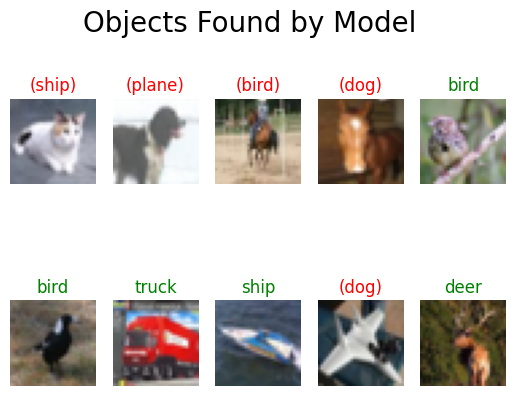

In [5]:
# Pick random photos from training set
if dataiter == None:
    dataiter = iter(testloader)
images, labels = dataiter.next()

# Load our model
net = Net()
net.load_state_dict(torch.load(PATH))

# Analyze images
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Show results
for i in range(batch_size):
    # Add new subplot
    plt.subplot(2, int(batch_size/2), i + 1)
    # Plot the image
    img = images[i]
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    # Add the image's label
    color = "green"
    label = classes[predicted[i]]
    if classes[labels[i]] != classes[predicted[i]]:
        color = "red"
        label = "(" + label + ")"
    plt.title(label, color=color)

plt.suptitle('Objects Found by Model', size=20)
plt.show()

# Step 5: Evaluate model accuracy

Let's conclude by evaluating our model's overall performance.

In [6]:
# Measure accuracy for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# Print accuracy statistics
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 55.8 %
Accuracy for class: car   is 56.2 %
Accuracy for class: bird  is 40.3 %
Accuracy for class: cat   is 25.0 %
Accuracy for class: deer  is 46.4 %
Accuracy for class: dog   is 40.8 %
Accuracy for class: frog  is 57.3 %
Accuracy for class: horse is 62.8 %
Accuracy for class: ship  is 69.7 %
Accuracy for class: truck is 61.6 %
